In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
wine = load_wine()
scaler = StandardScaler()
X = wine.data
y = wine.target
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)

(178, 13)


In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print(X_pca.shape)

(178, 2)


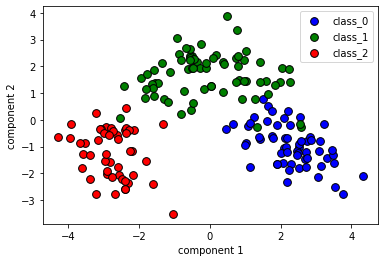

In [7]:
X0 = X_pca[wine.target==0]
X1 = X_pca[wine.target==1]
X2 = X_pca[wine.target==2]
plt.scatter(X0[:,0],X0[:,1],c='b',s=60,edgecolor='k')
plt.scatter(X1[:,0],X1[:,1],c='g',s=60,edgecolor='k')
plt.scatter(X2[:,0],X2[:,1],c='r',s=60,edgecolor='k')
plt.legend(wine.target_names,loc='best')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.show()

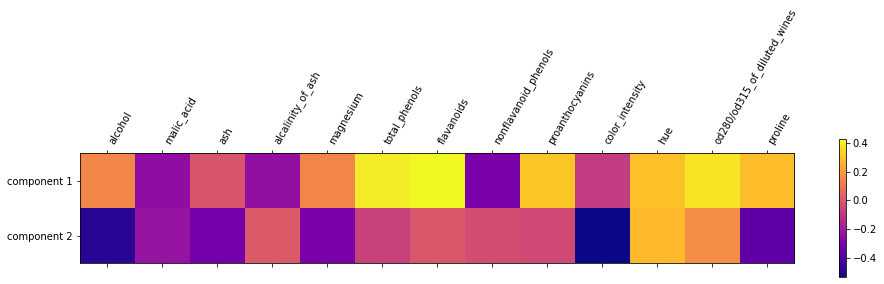

In [10]:
plt.matshow(pca.components_,cmap='plasma')
plt.yticks([0,1],['component 1','component 2'])
plt.colorbar()
plt.xticks(range(len(wine.feature_names)),wine.feature_names,rotation=60,ha='left')
plt.show()

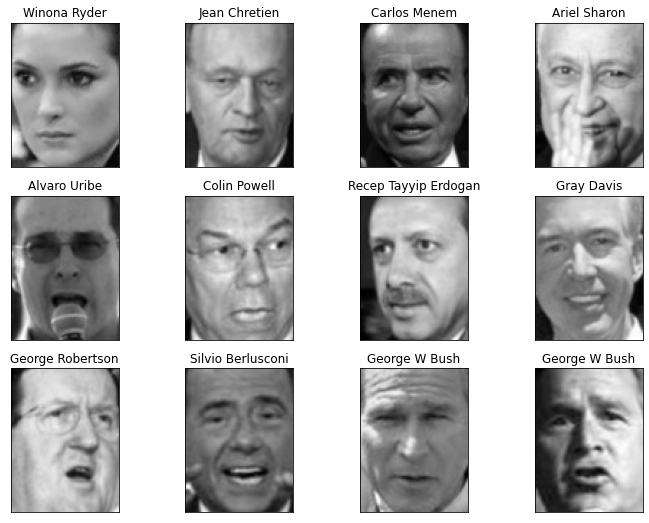

In [15]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=20,resize=0.8)
image_shape = faces.images[0].shape
fig,axes = plt.subplots(3,4,figsize=(12,9),subplot_kw={'xticks':(),'yticks':()})
for target,image,ax in zip(faces.target,faces.images,axes.ravel()):
    ax.imshow(image,cmap=plt.cm.gray)
    ax.set_title(faces.target_names[target])
plt.show()

In [19]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(faces.data/255,faces.target,random_state=62)
mlp = MLPClassifier(hidden_layer_sizes=[100,100],random_state=62,max_iter=400)
mlp.fit(X_train,y_train)
print('accuracy:{:.2f}'.format(mlp.score(X_test,y_test)))

accuracy:0.57


In [21]:
pca=PCA(whiten=True,n_components=0.9,random_state=62).fit(X_train)
X_train_whiten=pca.transform(X_train)
X_test_whiten=pca.transform(X_test)
print('shape after whiten:{}'.format(X_train_whiten.shape))

shape after whiten:(2267, 105)


In [22]:
mlp.fit(X_train_whiten,y_train)
print('accuracy after whiten:{:.2f}'.format(mlp.score(X_test_whiten,y_test)))

accuracy after whiten:0.58


In [24]:
from sklearn.decomposition import NMF
nmf=NMF(n_components=105,random_state=62).fit(X_train)
X_train_nmf=nmf.transform(X_train)
X_test_nmf=nmf.transform(X_test)
print('shape after nmf:{}'.format(X_train_nmf.shape))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


shape after nmf:(2267, 105)


In [26]:
mlp.fit(X_train_nmf,y_train)
print('accuracy after nmf:{:.2f}'.format(mlp.score(X_test_nmf,y_test)))

accuracy after nmf:0.56


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


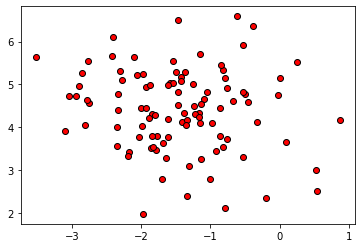

In [27]:
from sklearn.datasets import make_blobs
blobs=make_blobs(random_state=1,centers=1)
X_blobs=blobs[0]
plt.scatter(X_blobs[:,0],X_blobs[:,1],c='r',edgecolor='k')
plt.show()

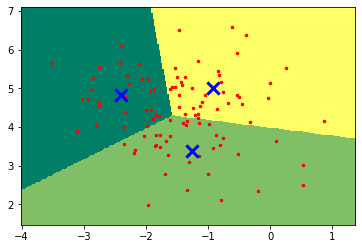

In [32]:
from sklearn.cluster import KMeans
import numpy as np
kmeans=KMeans(n_clusters=3)
kmeans.fit(X_blobs)
x_min,x_max=X_blobs[:,0].min()-0.5,X_blobs[:,0].max()+0.5
y_min,y_max=X_blobs[:,1].min()-0.5,X_blobs[:,1].max()+0.5
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
Z=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=plt.cm.summer,aspect='auto',origin='lower')
plt.plot(X_blobs[:,0],X_blobs[:,1],'r.',markersize=5)
centeroids=kmeans.cluster_centers_
plt.scatter(centeroids[:,0],centeroids[:,1],marker='x',s=150,linewidths=3,color='b',zorder=10)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.xticks()
plt.yticks()
plt.show()

In [33]:
print('KMeans labels:{}'.format(kmeans.labels_))

KMeans labels:[1 1 0 2 2 2 1 1 0 2 1 2 1 0 1 2 2 1 0 0 2 0 1 1 1 1 2 1 1 1 0 0 1 1 2 0 2
 0 1 0 2 1 0 0 2 2 2 1 0 1 0 1 2 0 2 2 0 2 2 1 2 0 2 1 0 2 0 0 1 2 2 1 2 2
 2 1 2 1 1 0 2 0 2 2 0 1 2 1 0 0 2 1 0 0 2 2 1 2 2 1]


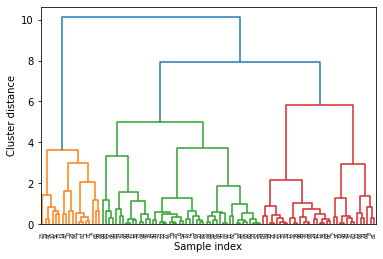

In [34]:
from scipy.cluster.hierarchy import dendrogram, ward
linkage = ward(X_blobs)
dendrogram(linkage)
ax=plt.gca()
plt.xlabel('Sample index')
plt.ylabel('Cluster distance')
plt.show()

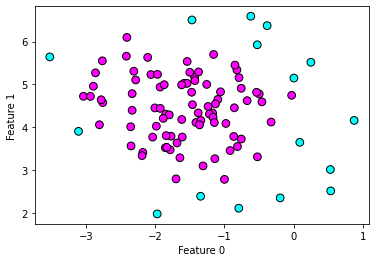

In [35]:
from sklearn.cluster import DBSCAN
db = DBSCAN()
clusters = db.fit_predict(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=clusters,cmap=plt.cm.cool,s=60,edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [36]:
print('\n\n\ncluster label is:\n{}\n\n\n'.format(clusters))




cluster label is:
[-1  0 -1  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0
  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0 -1 -1  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0  0  0  0  0  0 -1
  0  0  0 -1]





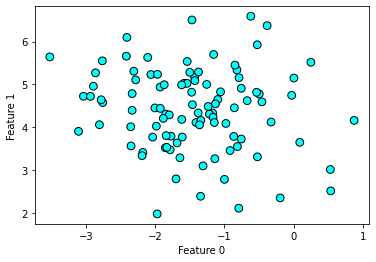

In [37]:
db_1 = DBSCAN(eps=2)
clusters_1 = db_1.fit_predict(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=clusters_1,cmap=plt.cm.cool,s=60,edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

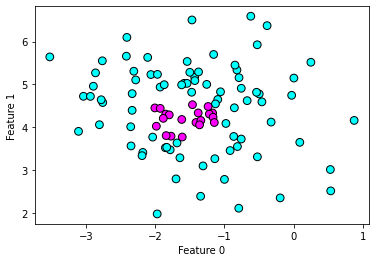

In [38]:
db_2 = DBSCAN(min_samples=20)
clusters_2=db_2.fit_predict(X_blobs)
plt.scatter(X_blobs[:,0],X_blobs[:,1],c=clusters_2,cmap=plt.cm.cool,s=60,edgecolor='k')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()